In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Read the CSV file
df = pd.read_csv('invest.txt', sep=' ')
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


<Axes: title={'center': 'Investment'}, xlabel='gnp', ylabel='invest'>

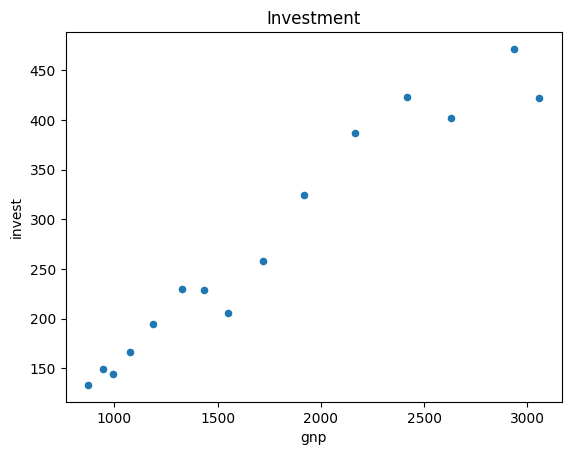

In [4]:
df.plot(x='gnp', y='invest', title='Investment', kind='scatter')

In [5]:
import numpy as np

df['gnp_log'] = np.log(df['gnp'])
df['invest_log'] = np.log(df['invest'])

In [6]:
def average(X):
    return sum(X) / len(X)


def fit(X, y):
    num = 0
    X_bar = average(X)
    y_bar = average(y)
    for i in range(len(X)):
        num += (X[i] - X_bar) * (y[i] - y_bar)
    den = 0
    for i in range(len(X)):
        den += (X[i] - X_bar) ** 2
    slope = num / den
    intercept = y_bar - slope * X_bar
    
    return intercept, slope

Equation: y = -1.9635913352301833 + 1.015281401598871 * x
R^2 determination: 0.9627572956057854


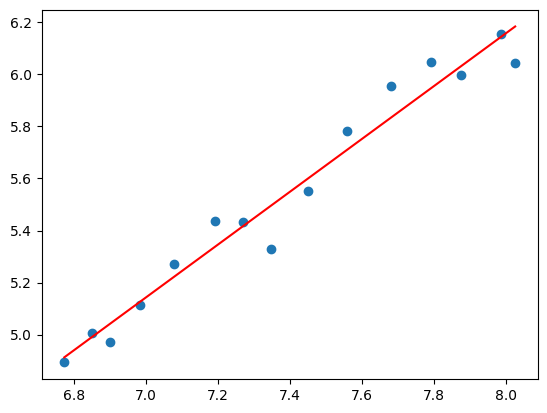

In [57]:
b, a = fit(df['gnp_log'], df['invest_log'])
print("Equation: y = {} + {} * x".format(b, a))

s1 = 0
for i in range(len(df['gnp_log'])):
    s1 += (df['invest_log'][i] - b - a * df['gnp_log'][i]) ** 2
s2 = 0
for i in range(len(df['gnp_log'])):
    s2 += (df['invest_log'][i] - average(df['invest_log'])) ** 2
R2 = 1 - s1 / s2
print("R^2 determination: {}".format(R2))

plt.scatter(df['gnp_log'], df['invest_log'])
X = np.linspace(min(df['gnp_log']), max(df['gnp_log']), 100)
plt.plot(X, a * X + b, 'r')
plt.show()

In [8]:
def std_estimator(X, y, a, b):
    s = 0
    for i in range(len(X)):
        s += (y[i] - (a * X[i] + b)) ** 2
    return (1/(len(X) - 2) * s) ** 0.5

In [9]:
def var_slope(X, y, a, b):
    sigma = std_estimator(X, y, a, b)
    s = 0
    for i in range(len(X)):
        s += (X[i] - average(X))**2
    return sigma ** 2 / s

In [10]:
from scipy.stats import t

p_score = a / var_slope(df['gnp_log'], df['invest_log'], a, b) ** 0.5
alpha = 0.05
min_t = -t.ppf(1-alpha/2, len(df['gnp_log']) - 2)
max_t = t.ppf(1-alpha/2, len(df['gnp_log']) - 2)
print("t-score: {}".format(p_score))
print("t-score is not in between {} and {}".format(min_t, max_t))

pvalue = 2 * (1 - t.cdf(abs(p_score), len(df['gnp_log']) - 2))
print("p-value: {}".format(pvalue))

t-score: 18.33198445686668
t-score is not in between -2.1603686564610127 and 2.1603686564610127
p-value: 1.1363709973011282e-10


In [23]:
def confidance_interval(x, X, y, a, b, alpha):
    num = (x - average(X)) ** 2
    den = 0
    for i in range(len(X)):
        den += (X[i] - average(X)) ** 2
    sr = (1 / len(X) + num / den) ** 0.5
    tq = t.ppf(1 - alpha / 2, len(X) - 2)
    sigma = std_estimator(X, y, a, b)
    return a * x + b - tq * sigma * sr, a * x + b + tq * sigma * sr

In [28]:
def prediction_interval(x, X, y, a, b, alpha):
    num = (x - average(X)) ** 2
    den = 0
    for i in range(len(X)):
        den += (X[i] - average(X)) ** 2
    sr = (1 + 1 / len(X) + num / den) ** 0.5
    tq = t.ppf(1 - alpha / 2, len(X) - 2)
    sigma = std_estimator(X, y, a, b)
    return a * x + b - tq * sigma * sr, a * x + b + tq * sigma * sr

In [30]:
predicted_investments = a * np.log(1000) + b
required_investments = np.exp(predicted_investments)
print("Required investments for GNP = 1000: {}".format(required_investments))

alpha = 0.10
m_i, M_i = confidance_interval(np.log(1000), df['gnp_log'], df['invest_log'], a, b, alpha)
print("Confidance interval for GNP = 1000: [{}, {}]".format(np.exp(m_i), np.exp(M_i)))
mp_i, Mp_i = prediction_interval(np.log(1000), df['gnp_log'], df['invest_log'], a, b, alpha)
print("Prediction interval for GNP = 1000: [{}, {}]".format(np.exp(mp_i), np.exp(Mp_i)))

Required investments for GNP = 1000: 155.97942793105466
Confidance interval for GNP = 1000: [146.67552673421926, 165.87349286827552]
Prediction interval for GNP = 1000: [132.00238933412913, 184.3116784508739]


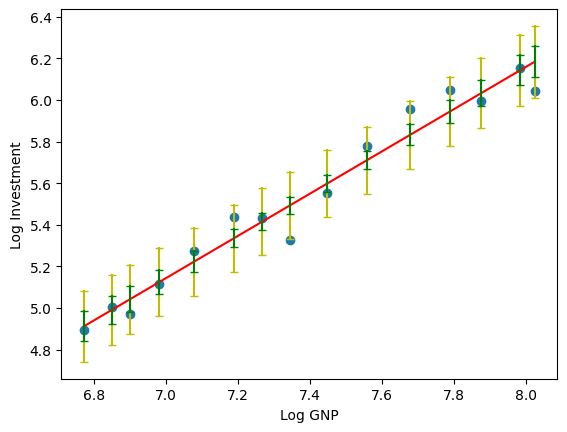

In [42]:
# Scatter plot
plt.scatter(df['gnp_log'], df['invest_log'], label='Data')

# Regression line
X = np.linspace(min(df['gnp_log']), max(df['gnp_log']), 100)
plt.plot(X, a * X + b, 'r', label='Regression line')

# Confidence and prediction intervals
alpha = 0.10
for i in range(len(df['gnp_log'])):
    x = df['gnp_log'][i]
    m_i, M_i = confidance_interval(x, df['gnp_log'], df['invest_log'], a, b, alpha)
    mp_i, Mp_i = prediction_interval(x, df['gnp_log'], df['invest_log'], a, b, alpha)
    plt.plot([x, x], [mp_i, Mp_i], 'y')
    plt.plot(x, mp_i, 'y_')
    plt.plot(x, Mp_i, 'y_')
    plt.plot([x, x], [m_i, M_i], 'g')
    plt.plot(x, m_i, 'g_')
    plt.plot(x, M_i, 'g_')

# Set plot labels and legend
plt.xlabel('Log GNP')
plt.ylabel('Log Investment')

# Show the plot
plt.show()

In [54]:
# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the data
model.fit(df['gnp_log'].values.reshape(-1, 1), df['invest_log'].values)

# Get the intercept and slope
intercept = model.intercept_
slope = model.coef_[0]

# Print the equation
print("Equation: y = {} + {} * x".format(intercept, slope))
print("R^2: {}".format(model.score(df['gnp_log'].values.reshape(-1, 1), df['invest_log'].values)))

predicted_investments = model.predict([[np.log(1000)]])
print("Required investments for GNP = 1000: {}".format(np.exp(predicted_investments)))

Equation: y = -1.9635913352301833 + 1.0152814015988711 * x
R^2: 0.9627572956057855
Required investments for GNP = 1000: [155.97942793]


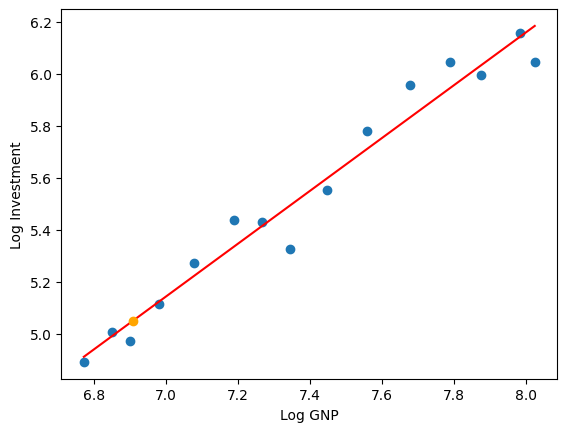

In [61]:
# Scatter plot
plt.scatter(df['gnp_log'], df['invest_log'], label='Data')

# regression plot
X = np.linspace(min(df['gnp_log']), max(df['gnp_log']), 100)
plt.plot(X, model.predict(X.reshape(-1, 1)), 'r', label='Regression line')

plt.plot(np.log(1000), predicted_investments, 'o', color='orange')

plt.xlabel('Log GNP')
plt.ylabel('Log Investment')
plt.show()



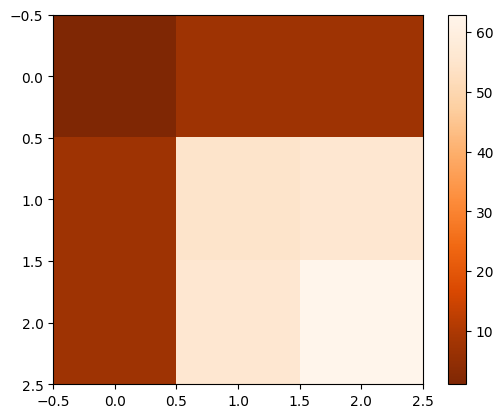

Rank of covariance matrix is : 3


In [83]:
X = np.concatenate((np.ones((len(df['gnp_log']), 1)), df['gnp_log'].values.reshape(-1, 1), df['interest'].values.reshape(-1, 1)), axis=1)
cov = 1 / len(X) * X.T @ X 

plt.imshow(cov, cmap='Oranges_r', interpolation='nearest')
plt.colorbar()
plt.show()

print(f"Rank of covariance matrix is : {np.linalg.matrix_rank(cov)}")

In [80]:
X = np.concatenate((np.ones((len(df['gnp_log']), 1)), df['gnp_log'].values.reshape(-1, 1), df['interest'].values.reshape(-1, 1)), axis=1)
y = df['invest_log']

# Calculate the coefficients using the normal equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Get the intercept and coefficients
intercept = coefficients[0]
coefficients = coefficients[1:]

# Print the equation
print("Equation: y = {} + {} * gnp_log + {} * interest".format(intercept, coefficients[0], coefficients[1]))

# Calculate the R^2 value
y_bar = average(y)
s1 = 0
for i in range(len(y)):
    s1 += (y[i] - (intercept + coefficients[0] * df['gnp_log'][i] + coefficients[1] * df['interest'][i])) ** 2
s2 = 0
for i in range(len(y)):
    s2 += (y[i] - y_bar) ** 2
R2 = 1 - s1 / s2
print("R^2 determination: {}".format(R2))

p_values = []
for i in range(len(coefficients)):
    p_values.append(coefficients[i] / var_slope(df['gnp_log'], df['invest_log'], coefficients[0], coefficients[1]) ** 0.5)
    
print("p-values: {}".format(p_values))

Equation: y = -2.1804547259139397 + 1.0512426913200048 * gnp_log + -0.006528879406112353 * interest
R^2 determination: 0.9633108306726244
p-values: [0.6960963523447476, -0.004323196895463702]
